## Classification using SVM and Random Forest
This project aims to classify and predict whether or not the borrower paid back their loan in full.
The dataset is taken from __[Loan Data](https://www.kaggle.com/datasets/itssuru/loan-data)__

In [1]:
#importing necessary modules
import os

#for data manipulation
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

### Loading Data


In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


It is seen that most of the data we are working with is numeric data except for the purpose column.

### Descriptive Statistics

In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
#checking for null values
print("Null value count")
df.isna().sum()

Null value count


credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

There are no null values

In [6]:
#checking for duplicate rows
duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates present")
else:
    print("There are no duplicates")

There are no duplicates


#### Bivariate Analysis
Finding correlation between features. This is useful to check if one feature is correlated to another.
Correlation values near 1 means high positive correlation, values near -1 means high negative correlation and a value of 0 means no correlation.

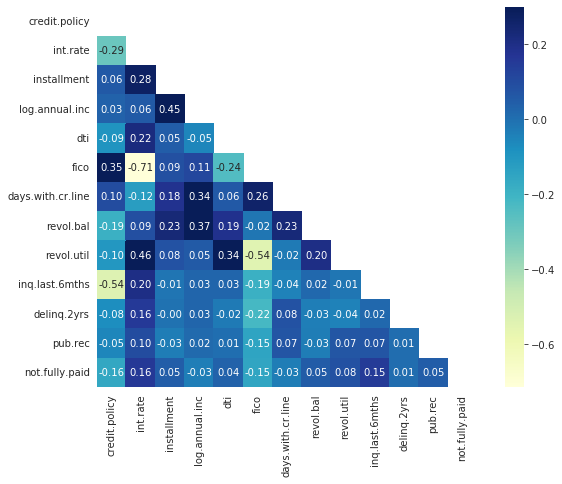

In [7]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 7))
    ax = sns.heatmap(corr, annot = True, fmt = '.2f',mask=mask, vmax=.3, square=True, cmap="YlGnBu")

In [8]:
print("The features with higher correlation are:")
corr_filtered = corr[(abs(corr) > 0.5) & (corr != 1.000)]
print(corr_filtered.unstack().sort_values(ascending = False).drop_duplicates().dropna())

The features with higher correlation are:
credit.policy  inq.last.6mths   -0.535511
fico           revol.util       -0.541289
int.rate       fico             -0.714821
dtype: float64


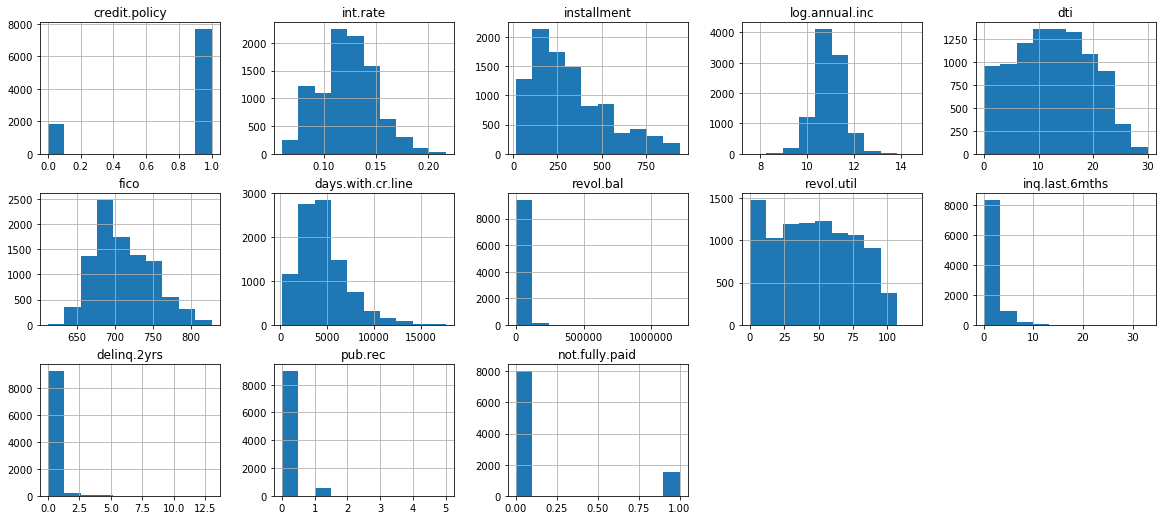

In [9]:
#plotting a histogram of the variables.
#This helps in the visualization of the variables as well as the range of values for each column.
df.hist(layout=(5,5), figsize=(20,15))
plt.show()

From the above graphs we can see that,
- Most of the curves follow a normal distribution
- The column 'revol.bal' has a wide range of values and does not follow a normal distribution.
- There is a class imbalance for our target class 'not.fully.paid'.

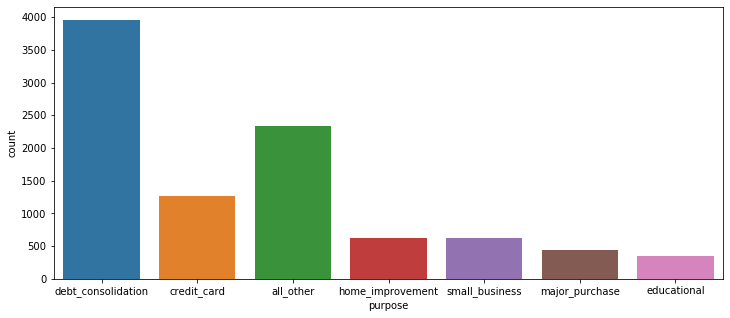

In [10]:
#plotting categorical variable 'purpose'.
plt.figure(figsize=(12,5))
sns.countplot(x='purpose', data=df)
plt.show()

From the above graph we see that debt consolidation is the major purpose for borrowing money and educational reasons take up the least.

### Pre-processing

In [11]:
#converting the column 'purpose' in categorical variable to one hot encoding 
df_enc = pd.get_dummies(df, prefix = 'purpose', prefix_sep='_')
df_enc

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


In [12]:
X = df_enc.drop('not.fully.paid', axis=1)
y = df_enc['not.fully.paid']

In [13]:
print(X.shape)
print(y.shape)

(9578, 19)
(9578,)


#### Dealing with imbalanced classes.
The minority class is oversampled using SMOTE technique to better balance the imbalanced classes and thereby improve the model performance.

In [14]:
smote = SMOTE(random_state=30, sampling_strategy = 0.8)

#resampling our dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Count before resampling for 'not.fully.paid': ")
print(y.value_counts())
print("\nCount after resampling for 'not.fully.paid': ")
print(y_resampled.value_counts())

Count before resampling for 'not.fully.paid': 
0    8045
1    1533
Name: not.fully.paid, dtype: int64

Count after resampling for 'not.fully.paid': 
0    8045
1    6436
Name: not.fully.paid, dtype: int64



Splitting the data

In [15]:
#splitting the data into 70% training and 30% test set
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=30)

### SVC model

In [16]:
rbf_svm_clf = Pipeline([
                ("scaler", StandardScaler()),
                ("svm_clf", SVC(kernel="rbf", gamma='auto'))
                ])

rbf_svm_clf.fit(X_train_resampled, y_train_resampled)

y_pred_svc = rbf_svm_clf.predict(X_test_resampled)

In [17]:
#function for evaluation of model
def evaluation(y_test, y_pred):
    print("\tConfusion Matrix")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar = False)
    plt.show()  
    print(classification_report(y_test,y_pred))

#### Evaluation of SVC

	Confusion Matrix


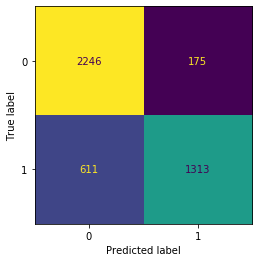

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      2421
           1       0.88      0.68      0.77      1924

    accuracy                           0.82      4345
   macro avg       0.83      0.81      0.81      4345
weighted avg       0.83      0.82      0.82      4345



In [18]:
evaluation(y_test_resampled, y_pred_svc)

### Random Forest Classifier

In [19]:
feature_names = list(X.columns)
rf_clf = RandomForestClassifier(random_state = 30)
rf_clf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_clf.predict(X_test_resampled)

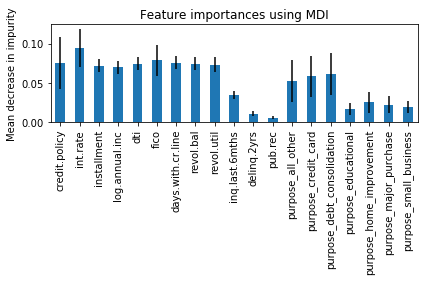

In [20]:
#calculating feature importance for the model
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

The above graph shows the most important features for the model

#### Evaluation of Random Forest

	Confusion Matrix


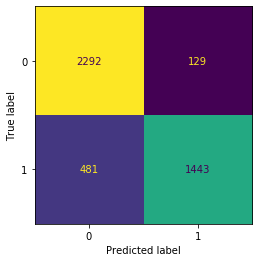

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      2421
           1       0.92      0.75      0.83      1924

    accuracy                           0.86      4345
   macro avg       0.87      0.85      0.85      4345
weighted avg       0.87      0.86      0.86      4345



In [21]:
evaluation(y_test_resampled, y_pred_rf)

#### Results
- The accuracy and F1 score are almost equal because our classes are closely balanced.
- From the evaluation it is seen that both SVC and Random Forest have a decent F1 score but, Random Forest has a better overall performance with an F1 score of 0.85 when compared to the F1 score of 0.81 for the SVC model.

#### Future Works
- Hypertuning the model to improve the performance.